In [20]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [21]:
df_1 = pd.read_csv('data/info_1.csv', index_col=0)
train_df = pd.read_csv('data/train_1.csv', header=None)
test_df = pd.read_csv('data/train_1.csv', header=None)

X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]

X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

In [22]:
perceptron = sklearn.neural_network.MLPClassifier().fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

/Users/rickytechnip/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
out_pred = np.c_[np.arange(1,len(y_pred) + 1), y_pred]

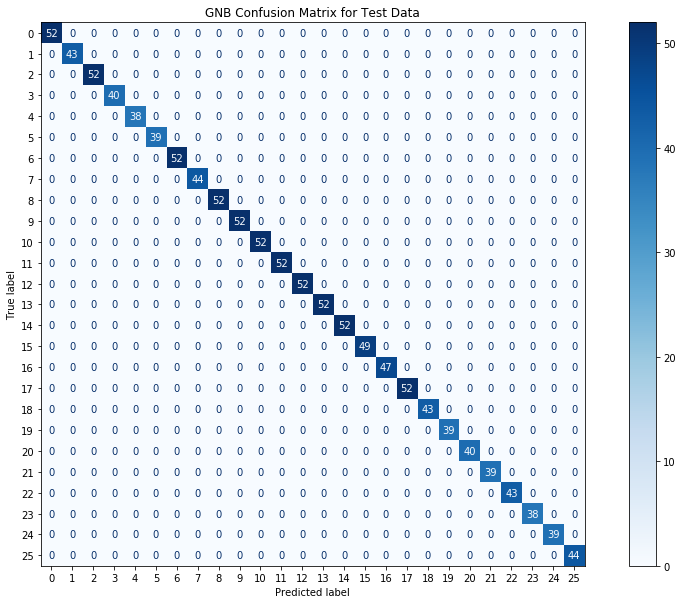

In [24]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# show confusion matrix plot
fig, ax = plt.subplots(figsize=(16,10))
plot_confusion_matrix(perceptron, X_test, y_test, cmap='Blues', ax=ax)
ax.set_title('GNB Confusion Matrix for Test Data')
plt.show()

In [25]:
df_1['precision'] = sklearn.metrics.precision_score(y_test, y_pred, average=None, zero_division=0)
df_1['recall'] = sklearn.metrics.recall_score(y_test, y_pred, average=None)
df_1['f1'] = sklearn.metrics.f1_score(y_test, y_pred, average=None)

df_1

,symbol,precision,recall,f1
index,,,,
0,A,1.0,1.0,1.0
1,B,1.0,1.0,1.0
2,C,1.0,1.0,1.0
3,D,1.0,1.0,1.0
4,E,1.0,1.0,1.0
5,F,1.0,1.0,1.0
6,G,1.0,1.0,1.0
7,H,1.0,1.0,1.0
8,I,1.0,1.0,1.0


In [26]:
scores = [
    sklearn.metrics.accuracy_score(y_test, y_pred),
    sklearn.metrics.f1_score(y_test, y_pred, average='macro'),
    sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
]
model_desc = pd.DataFrame(scores, index=['accuracy', 'macro-average', 'weighted-average'], columns=['DS_1'])
model_desc

,DS_1
accuracy,1.0
macro-average,1.0
weighted-average,1.0


In [27]:
%timeit df_1['new_col'] = range(1, len(df_1) + 1)
%timeit df_1['new_col'] = np.arange(1, df_1.shape[0] + 1)

50.8 µs ± 2.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
44.6 µs ± 2.83 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
